## Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Database: human activity recognition




Connect with database
---
- The local connection with spreadsheet

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

path_drive='/content/gdrive/MyDrive/Mestrado/ML-IA048-2024S1/T02'

Mounted at /content/gdrive/


### Inertial Signals

In [3]:
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    # "total_acc_x",
    # "total_acc_y",
    # "total_acc_z"
]

In [4]:
# Utility function to load the load
def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = f'{path_drive}/UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        print(filename)
        signals_data.append(pd.read_csv(filename, sep = '\s+', header = None))

    df= pd.concat(signals_data, axis=1)
    # df.columns= SIGNALS

    name_cols=[]
    for signal in SIGNALS:
      for i in range(128):
        name_cols.append(f'{signal}_{i}')
    # name_cols
    df.columns= name_cols
    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return df

In [5]:
def load_y(subset):
    filename = f'{path_drive}/UCI_HAR_Dataset/{subset}/y_{subset}.txt'
    y = pd.read_csv(filename, sep = '\s+', header = None)

    return y

In [6]:
def load_data():
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    # subject columns
    X_train['subject'] = pd.read_csv(f'{path_drive}/UCI_HAR_Dataset/train/subject_train.txt',
                          sep = '\s+',
                          header = None,
                          names = ['subject'])
    X_test['subject'] = pd.read_csv(f'{path_drive}/UCI_HAR_Dataset/test/subject_test.txt',
                        sep = '\s+',
                        header = None,
                        names = ['subject'])

    return X_train, X_test, y_train, y_test

In [7]:
# Loading the train and test data
X_train, X_test, y_train,y_test = load_data()

/content/gdrive/MyDrive/Mestrado/ML-IA048-2024S1/T02/UCI_HAR_Dataset/train/Inertial Signals/body_acc_x_train.txt
/content/gdrive/MyDrive/Mestrado/ML-IA048-2024S1/T02/UCI_HAR_Dataset/train/Inertial Signals/body_acc_y_train.txt
/content/gdrive/MyDrive/Mestrado/ML-IA048-2024S1/T02/UCI_HAR_Dataset/train/Inertial Signals/body_acc_z_train.txt
/content/gdrive/MyDrive/Mestrado/ML-IA048-2024S1/T02/UCI_HAR_Dataset/train/Inertial Signals/body_gyro_x_train.txt
/content/gdrive/MyDrive/Mestrado/ML-IA048-2024S1/T02/UCI_HAR_Dataset/train/Inertial Signals/body_gyro_y_train.txt
/content/gdrive/MyDrive/Mestrado/ML-IA048-2024S1/T02/UCI_HAR_Dataset/train/Inertial Signals/body_gyro_z_train.txt
/content/gdrive/MyDrive/Mestrado/ML-IA048-2024S1/T02/UCI_HAR_Dataset/test/Inertial Signals/body_acc_x_test.txt
/content/gdrive/MyDrive/Mestrado/ML-IA048-2024S1/T02/UCI_HAR_Dataset/test/Inertial Signals/body_acc_y_test.txt
/content/gdrive/MyDrive/Mestrado/ML-IA048-2024S1/T02/UCI_HAR_Dataset/test/Inertial Signals/body_a

In [8]:
X_train

,body_acc_x_0,body_acc_x_1,body_acc_x_2,body_acc_x_3,body_acc_x_4,body_acc_x_5,body_acc_x_6,body_acc_x_7,body_acc_x_8,body_acc_x_9,...,body_gyro_z_119,body_gyro_z_120,body_gyro_z_121,body_gyro_z_122,body_gyro_z_123,body_gyro_z_124,body_gyro_z_125,body_gyro_z_126,body_gyro_z_127,subject
0,0.000181,0.010139,0.009276,0.005066,0.010810,0.004045,0.004757,0.006214,0.003307,0.007572,...,-0.006891,-0.004903,0.001354,0.008033,0.007355,0.002669,-0.002170,-0.005643,-0.001446,1
1,0.001094,0.004550,0.002879,0.002247,0.003305,0.002416,0.001619,0.000981,0.000009,-0.000363,...,0.018556,0.018173,0.018046,0.019393,0.018070,0.014628,0.005045,-0.004424,-0.002798,1
2,0.003531,0.002285,-0.000420,-0.003738,-0.006706,-0.003148,0.000733,0.000668,0.002162,-0.000946,...,-0.002691,-0.000283,0.000404,-0.001556,-0.001239,-0.003032,-0.005566,-0.003702,-0.002645,1
3,-0.001772,-0.001311,0.000388,0.000408,-0.000355,0.000998,0.001109,-0.003149,-0.008882,-0.010483,...,-0.011208,-0.013223,-0.013121,-0.012114,-0.009983,-0.007534,-0.008408,-0.011158,-0.012987,1
4,0.000087,-0.000272,0.001022,0.003126,0.002284,0.000885,0.001933,0.002270,0.002247,0.002175,...,0.009031,0.009103,0.005473,0.003101,0.000470,-0.006906,-0.004491,-0.003441,-0.010082,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.388873,0.618763,0.774067,0.586568,0.217007,-0.027330,-0.171294,-0.218988,-0.137680,0.033094,...,0.041621,0.058743,0.135576,0.137811,0.068896,0.061847,0.105364,0.192774,0.251018,30
7348,0.711864,0.709237,0.321368,-0.028921,-0.208107,-0.192802,-0.066754,-0.042285,0.058089,0.106855,...,0.227756,0.184920,0.193896,0.285813,0.311248,0.324083,0.319005,0.231496,0.234651,30
7349,-0.226717,-0.177817,-0.150869,-0.132237,-0.068338,0.007874,0.096481,0.205834,0.441342,0.662930,...,0.299354,0.181229,0.117206,0.122451,0.172516,0.201440,0.254344,0.281431,0.254206,30
7350,-0.064806,-0.079933,-0.068350,-0.038477,-0.028679,0.018335,0.077571,0.253580,0.507805,0.583999,...,-0.024443,-0.104694,-0.085842,-0.013465,0.083361,0.176435,0.176212,0.163561,0.188734,30


### Summary of train database

In [9]:
dict_classes= { 1:'WALKING', 2:'WALKING_UPSTAIRS', 3:'WALKING_DOWNSTAIRS', 4:'SITTING', 5:'STANDING', 6:'LAYING',
               '1':'WALKING', '2':'WALKING_UPSTAIRS', '3':'WALKING_DOWNSTAIRS', '4':'SITTING', '5':'STANDING', '6':'LAYING'}
y_train_labels = y_train.replace(dict_classes)
train = X_train.copy()
train['Activity'] = y_train.copy()
train['ActivityName'] = y_train_labels.copy()
train.sample()

,body_acc_x_0,body_acc_x_1,body_acc_x_2,body_acc_x_3,body_acc_x_4,body_acc_x_5,body_acc_x_6,body_acc_x_7,body_acc_x_8,body_acc_x_9,...,body_gyro_z_121,body_gyro_z_122,body_gyro_z_123,body_gyro_z_124,body_gyro_z_125,body_gyro_z_126,body_gyro_z_127,subject,Activity,ActivityName
5257,-0.086878,-0.066049,-0.032998,0.009095,0.014391,-0.01092,-0.024589,-0.039226,-0.060037,-0.081397,...,0.012382,0.09615,0.188981,0.294012,0.353982,0.354381,0.313265,25,2,WALKING_UPSTAIRS


In [10]:
print(X_train.info())
print(y_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 769 entries, body_acc_x_0 to subject
dtypes: float64(768), int64(1)
memory usage: 43.1 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       7352 non-null   int64
dtypes: int64(1)
memory usage: 57.6 KB
None


In [11]:
print(X_train.describe())
print(y_train.describe())

       body_acc_x_0  body_acc_x_1  body_acc_x_2  body_acc_x_3  body_acc_x_4  \
count   7352.000000   7352.000000   7352.000000   7352.000000   7352.000000   
mean      -0.003374     -0.002858     -0.001708     -0.000536      0.000333   
std        0.198317      0.197407      0.197976      0.196811      0.195771   
min       -0.857863     -0.897771     -0.975056     -0.984342     -0.886248   
25%       -0.038449     -0.037463     -0.036089     -0.033924     -0.033026   
50%       -0.000718     -0.000747     -0.000624     -0.000658     -0.000719   
75%        0.008661      0.008745      0.008930      0.008600      0.008426   
max        1.133144      1.091050      1.097443      1.046354      1.107588   

       body_acc_x_5  body_acc_x_6  body_acc_x_7  body_acc_x_8  body_acc_x_9  \
count   7352.000000   7352.000000   7352.000000   7352.000000   7352.000000   
mean       0.000480     -0.000289     -0.001002     -0.000909     -0.000574   
std        0.196652      0.195381      0.194239    

In [12]:
X_test.describe()
y_test.describe()

,0
count,2947.000000
mean,3.577876
std,1.740348
min,1.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,6.000000


In [13]:
X_test.info()
y_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 769 entries, body_acc_x_0 to subject
dtypes: float64(768), int64(1)
memory usage: 17.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2947 non-null   int64
dtypes: int64(1)
memory usage: 23.1 KB


### Visualize the database

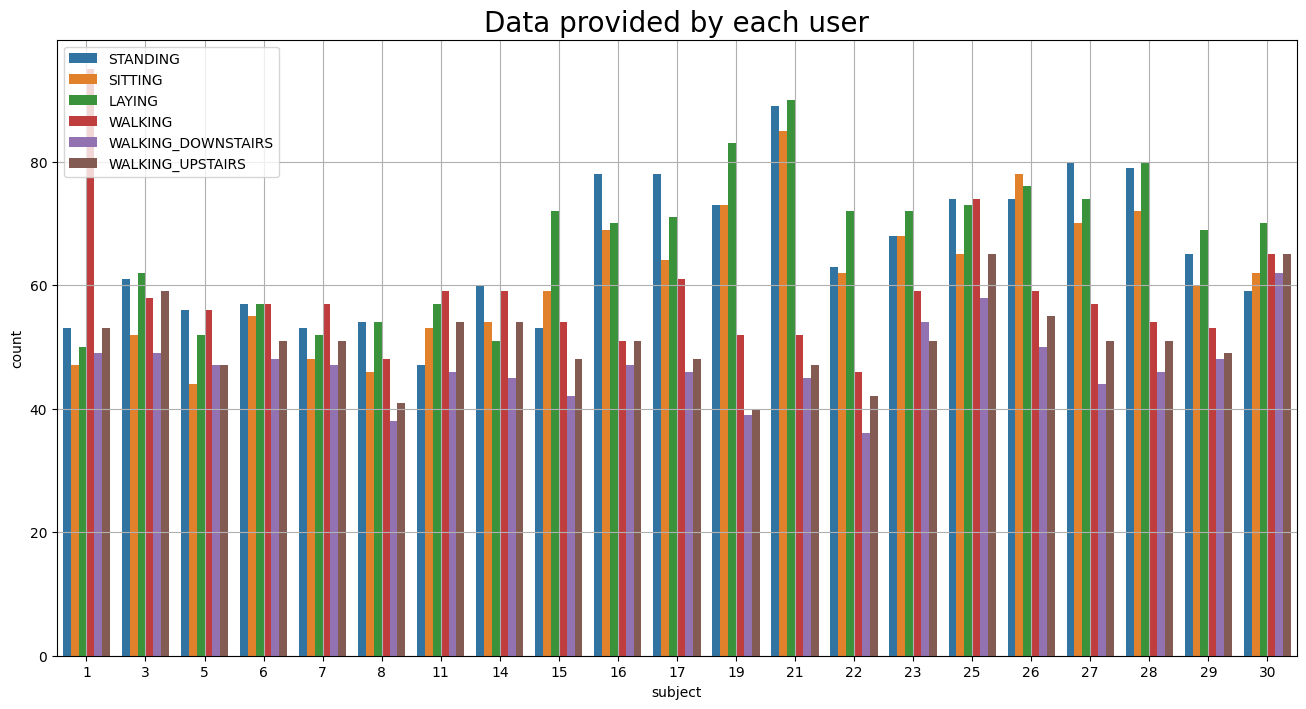

In [14]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = train)
sns.set_palette("colorblind")
plt.legend(loc='best')
plt.grid()
plt.savefig(f'{path_drive}/fig01_Data_Users.eps', format='eps')
plt.show()

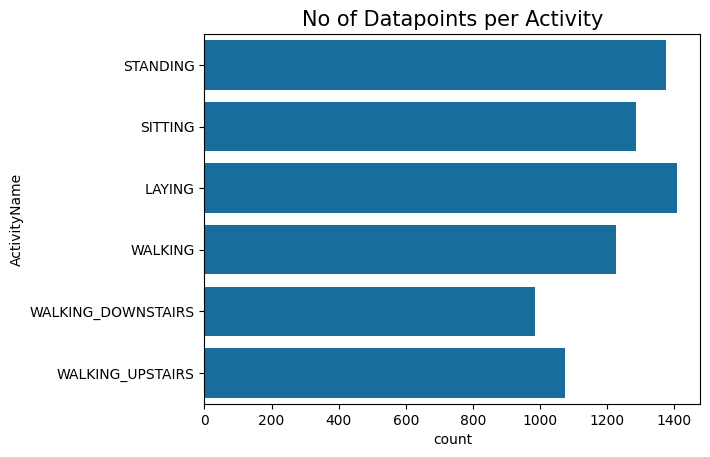

In [15]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(train.ActivityName)
plt.xticks()
plt.savefig(f'{path_drive}/fig02_NDatapointsPerActivity.eps', format='eps')
plt.show()

# Logistic Regression

### Apply the default method of logistic regression analysis

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [17]:
lr= LogisticRegression(multi_class='ovr')
model= lr.fit(X_train, np.ravel(y_train))

pred_lr= model.predict(X_test)
print( confusion_matrix(y_test, pred_lr) )

train_acc= model.score(X_train, y_train)
test_acc= model.score(X_test, y_test)
n=1
# acc_list_train.append( train_acc )
# acc_list_test.append( test_acc )
print('\n\n >%d, train: %.3f, test: %.3f' %(n, train_acc, test_acc))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[140  82 111  37  60  66]
 [ 72 130  84  36  54  95]
 [100  62 121  36  54  47]
 [  8   8   3  55 291 126]
 [ 14  12   7  44 323 132]
 [  4   2   1  33 325 172]]


 >1, train: 0.420, test: 0.319


In [18]:
lr2= LogisticRegression(multi_class='ovr', solver='liblinear')
model2= lr2.fit(X_train, np.ravel(y_train))

pred_lr2= model2.predict(X_test)
print( confusion_matrix(y_test, pred_lr2) )

train_acc2= model2.score(X_train, y_train)
test_acc2= model2.score(X_test, y_test)
n=2
# acc_list_train.append( train_acc )
# acc_list_test.append( test_acc )
print('\n\n >%d, train: %.3f, test: %.3f' %(n, train_acc2, test_acc2) )

[[135  77 104  38  66  76]
 [ 71 135  78  37  48 102]
 [103  70 118  31  47  51]
 [  4   7   3  49 275 153]
 [ 14   7   6  29 310 166]
 [  2   2   1  19 319 194]]


 >2, train: 0.430, test: 0.319


In [19]:
def variation_parameters_LR(alg="", w="", p="", n_exe=""):

  if len(w) != 0:
    lr3= LogisticRegression(multi_class=alg, solver=w )
  elif len(p) != 0:
    lr3= LogisticRegression(multi_class=alg, solver=w, penalty=p)
  else:
    lr3= LogisticRegression(multi_class=alg)

  model3= lr3.fit(X_train, np.ravel(y_train))

  pred_lr3= lr3.predict(X_test)

  train_acc1= lr3.score(X_train, y_train)
  test_acc1= lr3.score(X_test, y_test)

  print('>%d, train: %.3f, test: %.3f' %(n_exe, train_acc1, test_acc1))
  print(classification_report(y_test, pred_lr3))

  # res_df = get_df_scores_to_each_class( classification_report(y_test, pred_k1), n_classes, dict_classes )

In [20]:
n_exe=1

variation_parameters_LR('ovr', "", "", n_exe)
n_exe += 1

variation_parameters_LR('ovr','liblinear', "", n_exe)
n_exe += 1

variation_parameters_LR('ovr','liblinear', 'l1', n_exe)
n_exe += 1

variation_parameters_LR('multinomial','newton-cg',"", n_exe)
n_exe += 1

variation_parameters_LR('multinomial', "", "", n_exe)
n_exe += 1



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


>1, train: 0.420, test: 0.319
              precision    recall  f1-score   support

           1       0.41      0.28      0.34       496
           2       0.44      0.28      0.34       471
           3       0.37      0.29      0.32       420
           4       0.23      0.11      0.15       491
           5       0.29      0.61      0.39       532
           6       0.27      0.32      0.29       537

    accuracy                           0.32      2947
   macro avg       0.34      0.31      0.31      2947
weighted avg       0.33      0.32      0.31      2947

>2, train: 0.430, test: 0.319
              precision    recall  f1-score   support

           1       0.41      0.27      0.33       496
           2       0.45      0.29      0.35       471
           3       0.38      0.28      0.32       420
           4       0.24      0.10      0.14       491
           5       0.29      0.58      0.39       532
           6       0.26      0.36      0.30       537

    accuracy     

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
n=3

lr3= LogisticRegression(multi_class='ovr', solver='liblinear', penalty='l1')
model3= lr3.fit(X_train, np.ravel(y_train))

pred_lr3= model3.predict(X_test)
print( confusion_matrix(y_test, pred_lr3) )

train_acc3= model3.score(X_train, y_train)
test_acc3= model3.score(X_test, y_test)

# acc_list_train.append( train_acc )
# acc_list_test.append( test_acc )
print('\n\n >%d, train: %.3f, test: %.3f' %(n, train_acc3, test_acc3) )

[[141  88 111  29  56  71]
 [ 76 135  82  32  50  96]
 [103  64 128  35  34  56]
 [  8   7   3  41 263 169]
 [ 19   8   6  28 309 162]
 [  3   2   1  13 326 192]]


 >3, train: 0.419, test: 0.321


In [22]:
n=4

lr4= LogisticRegression(multi_class='multinomial', solver='newton-cg')
model4= lr4.fit(X_train, np.ravel(y_train))

pred_lr4= model4.predict(X_test)
print( confusion_matrix(y_test, pred_lr4) )

train_acc4= model4.score(X_train, y_train)
test_acc4= model4.score(X_test, y_test)

# acc_list_train.append( train_acc )
# acc_list_test.append( test_acc )
print('\n\n >%d, train: %.3f, test: %.3f' %(n, train_acc4, test_acc4) )

[[137  77 103  36  70  73]
 [ 73 128  80  41  52  97]
 [ 96  70 125  32  52  45]
 [  3   5   3  58 296 126]
 [ 11   6   7  41 335 132]
 [  1   2   2  34 322 176]]


 >4, train: 0.435, test: 0.325


In [23]:
n=5

lr5= LogisticRegression(multi_class='multinomial')
model5= lr5.fit(X_train, np.ravel(y_train))

pred_lr5= model5.predict(X_test)
print( confusion_matrix(y_test, pred_lr4) )

train_acc5= model5.score(X_train, y_train)
test_acc5= model5.score(X_test, y_test)

# acc_list_train.append( train_acc )
# acc_list_test.append( test_acc )
print('\n\n >%d, train: %.3f, test: %.3f' %(n, train_acc5, test_acc5) )

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[137  77 103  36  70  73]
 [ 73 128  80  41  52  97]
 [ 96  70 125  32  52  45]
 [  3   5   3  58 296 126]
 [ 11   6   7  41 335 132]
 [  1   2   2  34 322 176]]


 >5, train: 0.390, test: 0.311


Com base nos valores de acurácia obtido nas execuções anteriores, foi selecionado a Execução 4 para dar prosseguimento dos outros reports e matriz de confusão:

In [24]:
print( confusion_matrix(y_test, pred_lr) )
print( classification_report(y_test, pred_lr) )

[[140  82 111  37  60  66]
 [ 72 130  84  36  54  95]
 [100  62 121  36  54  47]
 [  8   8   3  55 291 126]
 [ 14  12   7  44 323 132]
 [  4   2   1  33 325 172]]
              precision    recall  f1-score   support

           1       0.41      0.28      0.34       496
           2       0.44      0.28      0.34       471
           3       0.37      0.29      0.32       420
           4       0.23      0.11      0.15       491
           5       0.29      0.61      0.39       532
           6       0.27      0.32      0.29       537

    accuracy                           0.32      2947
   macro avg       0.34      0.31      0.31      2947
weighted avg       0.33      0.32      0.31      2947



In [25]:
print( confusion_matrix(y_test, pred_lr2) )
print( classification_report(y_test, pred_lr2) )

[[135  77 104  38  66  76]
 [ 71 135  78  37  48 102]
 [103  70 118  31  47  51]
 [  4   7   3  49 275 153]
 [ 14   7   6  29 310 166]
 [  2   2   1  19 319 194]]
              precision    recall  f1-score   support

           1       0.41      0.27      0.33       496
           2       0.45      0.29      0.35       471
           3       0.38      0.28      0.32       420
           4       0.24      0.10      0.14       491
           5       0.29      0.58      0.39       532
           6       0.26      0.36      0.30       537

    accuracy                           0.32      2947
   macro avg       0.34      0.31      0.31      2947
weighted avg       0.34      0.32      0.31      2947



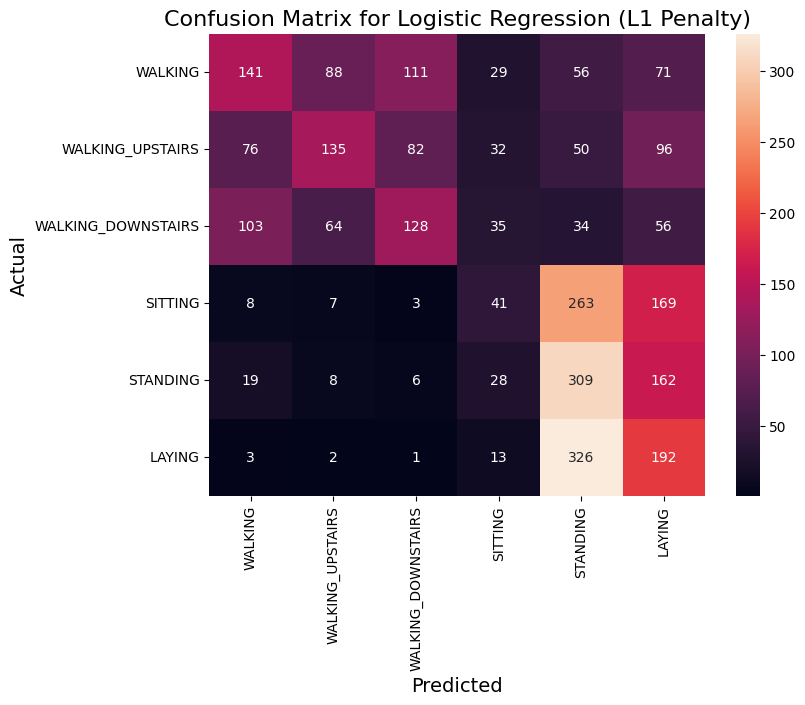

In [26]:
# Get the confusion matrix
cm = confusion_matrix(y_test, pred_lr3)
class_names = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names)

# Add labels and title
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.title("Confusion Matrix for Logistic Regression (L1 Penalty)", fontsize=16)

# Save the plot
plt.savefig(f'{path_drive}/fig03_ConfusionMatrix_LR_L1.eps', format='eps')

# Show the plot
plt.show()


In [27]:
print( confusion_matrix(y_test, pred_lr3) )
print( classification_report(y_test, pred_lr3) )

[[141  88 111  29  56  71]
 [ 76 135  82  32  50  96]
 [103  64 128  35  34  56]
 [  8   7   3  41 263 169]
 [ 19   8   6  28 309 162]
 [  3   2   1  13 326 192]]
              precision    recall  f1-score   support

           1       0.40      0.28      0.33       496
           2       0.44      0.29      0.35       471
           3       0.39      0.30      0.34       420
           4       0.23      0.08      0.12       491
           5       0.30      0.58      0.39       532
           6       0.26      0.36      0.30       537

    accuracy                           0.32      2947
   macro avg       0.34      0.32      0.31      2947
weighted avg       0.33      0.32      0.31      2947



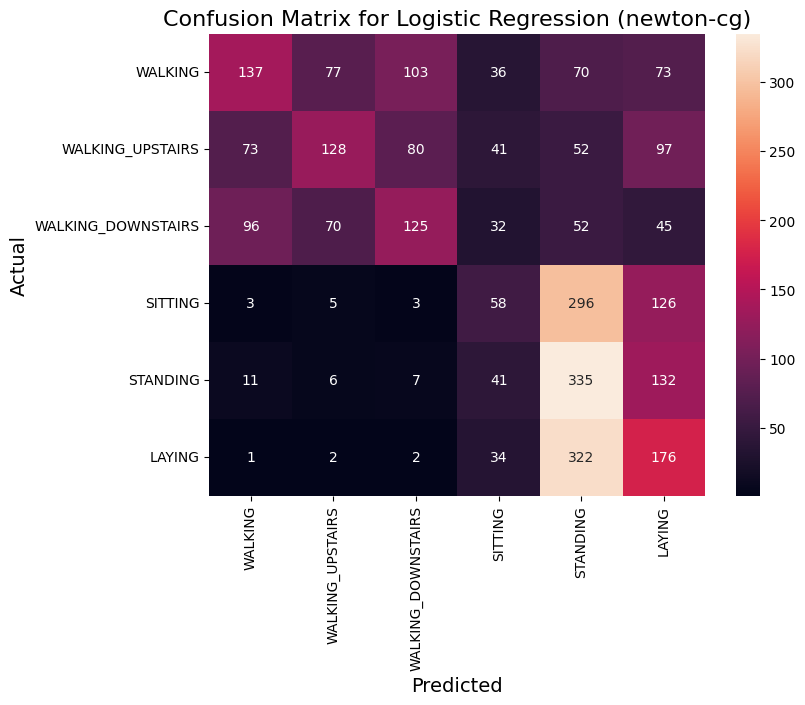

In [28]:
# prompt: plotar confusion_matrix(y_test, pred_lr3)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm = confusion_matrix(y_test, pred_lr4)
class_names = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names)

# Add labels and title
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.title("Confusion Matrix for Logistic Regression (newton-cg)", fontsize=16)

# Save the plot
plt.savefig(f'{path_drive}/fig04_ConfusionMatrix_Multinomial_newton-cg.eps', format='eps')

# Show the plot
plt.show()


In [29]:
print( confusion_matrix(y_test, pred_lr4) )
print( classification_report(y_test, pred_lr4) )

[[137  77 103  36  70  73]
 [ 73 128  80  41  52  97]
 [ 96  70 125  32  52  45]
 [  3   5   3  58 296 126]
 [ 11   6   7  41 335 132]
 [  1   2   2  34 322 176]]
              precision    recall  f1-score   support

           1       0.43      0.28      0.34       496
           2       0.44      0.27      0.34       471
           3       0.39      0.30      0.34       420
           4       0.24      0.12      0.16       491
           5       0.30      0.63      0.40       532
           6       0.27      0.33      0.30       537

    accuracy                           0.33      2947
   macro avg       0.34      0.32      0.31      2947
weighted avg       0.34      0.33      0.31      2947



In [30]:
print( confusion_matrix(y_test, pred_lr5) )
print( classification_report(y_test, pred_lr5) )

[[135  73  98  46  65  79]
 [ 81 123  83  32  55  97]
 [ 77  61 119  49  46  68]
 [  7   6   3  59 261 155]
 [ 12   8   7  51 289 165]
 [  2   2   0  30 312 191]]
              precision    recall  f1-score   support

           1       0.43      0.27      0.33       496
           2       0.45      0.26      0.33       471
           3       0.38      0.28      0.33       420
           4       0.22      0.12      0.16       491
           5       0.28      0.54      0.37       532
           6       0.25      0.36      0.30       537

    accuracy                           0.31      2947
   macro avg       0.34      0.31      0.30      2947
weighted avg       0.33      0.31      0.30      2947



### Drafts

In [31]:
lr2 = LogisticRegression(multi_class='ovr', solver='liblinear')
model = lr.fit(X_train, np.ravel(y_train))

accuracy = model.score(X_test, y_test)
print("Accuracy is {}".format(accuracy))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy is 0.3193077706141839


In [32]:
print(f'Index:{X_test.iloc[50][X_test.iloc[50] != 0 ].keys() }')
print(f'Action: {y_test.iloc[50]}')

Index:Index(['body_acc_x_0', 'body_acc_x_1', 'body_acc_x_2', 'body_acc_x_3',
       'body_acc_x_4', 'body_acc_x_5', 'body_acc_x_6', 'body_acc_x_7',
       'body_acc_x_8', 'body_acc_x_9',
       ...
       'body_gyro_z_119', 'body_gyro_z_120', 'body_gyro_z_121',
       'body_gyro_z_122', 'body_gyro_z_123', 'body_gyro_z_124',
       'body_gyro_z_125', 'body_gyro_z_126', 'body_gyro_z_127', 'subject'],
      dtype='object', length=769)
Action: 0    4
Name: 50, dtype: int64


In [33]:
test = X_test.iloc[50].values.reshape(-1, 1).T
proba = model.predict_proba(test)
classes = model.classes_
resultdf = pd.DataFrame(data=proba, columns=classes)

toppred = resultdf.T.sort_values(by=[0], ascending=[False])
toppred.head()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


,0
5,0.218548
6,0.206432
1,0.176927
4,0.172284
2,0.117214


In [34]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.41      0.28      0.34       496
           2       0.44      0.28      0.34       471
           3       0.37      0.29      0.32       420
           4       0.23      0.11      0.15       491
           5       0.29      0.61      0.39       532
           6       0.27      0.32      0.29       537

    accuracy                           0.32      2947
   macro avg       0.34      0.31      0.31      2947
weighted avg       0.33      0.32      0.31      2947



# KNN - Classification

In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier( n_neighbors=1 )
knn.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

In [36]:
pred= knn.predict(X_test)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, f1_score
confusion_matrix(y_test, pred)

array([[189,   2,   2,  41, 177,  85],
       [  4, 212,   1,  66, 132,  56],
       [  5,  19,  57,  71, 185,  83],
       [  0,   0,   0, 320,  66, 105],
       [  0,   0,   0, 130, 293, 109],
       [  0,   0,   0, 170,  74, 293]])

In [38]:
print( classification_report(y_test, pred) )

              precision    recall  f1-score   support

           1       0.95      0.38      0.54       496
           2       0.91      0.45      0.60       471
           3       0.95      0.14      0.24       420
           4       0.40      0.65      0.50       491
           5       0.32      0.55      0.40       532
           6       0.40      0.55      0.46       537

    accuracy                           0.46      2947
   macro avg       0.66      0.45      0.46      2947
weighted avg       0.64      0.46      0.46      2947



In [39]:
knn2= KNeighborsClassifier( n_neighbors=2 )
knn2.fit(X_train, y_train)

pred2= knn2.predict(X_test)
conf2 = confusion_matrix(y_test, pred)
print(conf2 )
print( classification_report(y_test, pred2) )

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[[189   2   2  41 177  85]
 [  4 212   1  66 132  56]
 [  5  19  57  71 185  83]
 [  0   0   0 320  66 105]
 [  0   0   0 130 293 109]
 [  0   0   0 170  74 293]]
              precision    recall  f1-score   support

           1       0.89      0.40      0.55       496
           2       0.90      0.48      0.62       471
           3       0.95      0.15      0.26       420
           4       0.36      0.79      0.49       491
           5       0.31      0.51      0.38       532
           6       0.50      0.40      0.44       537

    accuracy                           0.46      2947
   macro avg       0.65      0.45      0.46      2947
weighted avg       0.63      0.46      0.46      2947



In [40]:
def get_df_scores_to_each_class(res=pd.DataFrame(), n_classes=1, n_label={}):
  lines= res.split('\n')

  ## In this case, we apply to HAR database inertial sensors
  ## n_classes is 6
  # print(lines[0])   ## header -  name     precision    recall  f1-score   support
  # print(lines[1])   ## class 1 - 'WALKING'
  # print(lines[2])   ## class 2 - 'WALKING_UPSTAIRS'
  # print(lines[3])   ## class 3 - 'WALKING_DOWNSTAIRS'
  # print(lines[4])   ## class 4 - 'SITTING'
  # print(lines[5])   ## class 5 - 'STANDING'
  # print(lines[6])   ## class 6 - 'LAYING'

  name_list= ['class', 'precision', 'recall', 'f1-score', 'support']

  # Remove linhas vazias do final e inicial
  lines = [line for line in lines if line.strip()]
  lines = [line.split() for line in lines[1 : n_classes+1 ]]

  # Transforma as métricas em um DataFrame
  res_df = pd.DataFrame(lines, columns=name_list)

  if len(n_label) == 0:  # Se a lista estiver vazia
    n_label = range(n_classes)
  # obs: to verify if the dictionary of class considering 'string' : 'string', such as, '3': 'WALKING_DOWNSTAIRS' and 3:'WALKING_DOWNSTAIRS'
  else:
    res_df['class'] = res_df['class'].replace(n_label)
  return res_df



In [41]:
res_df = get_df_scores_to_each_class( classification_report(y_test, pred2), 6, dict_classes)

In [42]:
knn3= KNeighborsClassifier( n_neighbors=3 )
knn3.fit(X_train, y_train)

pred3= knn3.predict(X_test)
accuracy = model.score(X_test, y_test)
confusion_matrix(y_test, pred3)
print( classification_report(y_test, pred3) )

res_df = get_df_scores_to_each_class( classification_report(y_test, pred3), 6, dict_classes)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           1       0.88      0.33      0.48       496
           2       0.90      0.37      0.53       471
           3       0.95      0.09      0.16       420
           4       0.35      0.67      0.46       491
           5       0.30      0.49      0.37       532
           6       0.38      0.51      0.44       537

    accuracy                           0.42      2947
   macro avg       0.62      0.41      0.40      2947
weighted avg       0.61      0.42      0.41      2947



### Trainning with differents k in loop

In [43]:
acc_list_test = []
acc_list_train = []

acc_mac_list = []
acc_weight_avg = []

y_train_labels

precision = []
recall = []
f1_score = []
support = []

pred_k_list = []
conf_matrix_k = []
result_k_list = []

n_classes = 6

# Inicializa as listas de precisão, recall, f1-score e support para cada classe
for _ in range(n_classes):
    precision.append([])
    recall.append([])
    f1_score.append([])
    support.append([])

n_range=51
for k in range(1, n_range+1):
  knn_k= KNeighborsClassifier( n_neighbors= k )
  result_k= knn_k.fit(X_train, y_train.values.ravel())

  result_k_list.append(result_k)

  pred_k= knn_k.predict(X_test)
  pred_k_list.append(pred_k)

  conf_matrix_k.append( confusion_matrix(y_test, pred_k) )


  train_acc= knn_k.score(X_train, y_train)
  test_acc= knn_k.score(X_test, y_test)

  acc_list_train.append( train_acc )
  acc_list_test.append( test_acc )
  print('>%d, train: %.3f, test: %.3f' %(k, train_acc, test_acc))

  res_df = get_df_scores_to_each_class( classification_report(y_test, pred_k), n_classes, dict_classes )

  for i in range(0,n_classes):
    precision[i].append(res_df['precision'][i])
    recall[i].append(res_df['recall'][i])
    f1_score[i].append(res_df['f1-score'][i])
    support[i].append(res_df['support'][i])


# print(precision)
# print(recall)
# print(f1_score)
# print(support)

>1, train: 1.000, test: 0.463
>2, train: 0.900, test: 0.461
>3, train: 0.803, test: 0.419
>4, train: 0.758, test: 0.391
>5, train: 0.714, test: 0.372
>6, train: 0.680, test: 0.363
>7, train: 0.645, test: 0.356
>8, train: 0.614, test: 0.348
>9, train: 0.596, test: 0.340
>10, train: 0.567, test: 0.329
>11, train: 0.549, test: 0.320
>12, train: 0.525, test: 0.311
>13, train: 0.508, test: 0.303
>14, train: 0.493, test: 0.298
>15, train: 0.476, test: 0.294
>16, train: 0.458, test: 0.289
>17, train: 0.446, test: 0.284
>18, train: 0.432, test: 0.279
>19, train: 0.422, test: 0.277
>20, train: 0.411, test: 0.273
>21, train: 0.401, test: 0.269
>22, train: 0.393, test: 0.268
>23, train: 0.385, test: 0.266
>24, train: 0.377, test: 0.261
>25, train: 0.371, test: 0.261
>26, train: 0.359, test: 0.257
>27, train: 0.351, test: 0.252
>28, train: 0.346, test: 0.249
>29, train: 0.341, test: 0.249
>30, train: 0.335, test: 0.250
>31, train: 0.327, test: 0.248
>32, train: 0.324, test: 0.248
>33, train: 0.318

#### Drafts

In [44]:
conf_matrix_k[1]

array([[196,   2,   2,  70, 198,  28],
       [ 13, 224,   1,  91, 113,  29],
       [ 12,  23,  62,  93, 170,  60],
       [  0,   0,   0, 390,  51,  50],
       [  0,   0,   0, 209, 273,  50],
       [  0,   0,   0, 241,  82, 214]])

In [45]:
acc_list_test

[0.4628435697319308,
 0.46114692908042076,
 0.4190702409229725,
 0.39056667797760436,
 0.37156430268069224,
 0.3630810994231422,
 0.35629453681710216,
 0.3484899898201561,
 0.340006786562606,
 0.32914828639294197,
 0.31964709874448594,
 0.3108245673566339,
 0.3026806922293858,
 0.2979300984051578,
 0.2941974889718358,
 0.2891075670173057,
 0.2840176450627757,
 0.2785883949779437,
 0.27689175432643365,
 0.27281981676280964,
 0.2694265354597896,
 0.26772989480827963,
 0.2656939260264676,
 0.26060400407193757,
 0.26128266033254155,
 0.25653206650831356,
 0.2524601289446895,
 0.2494061757719715,
 0.2490668476416695,
 0.2500848320325755,
 0.24770953512046148,
 0.24770953512046148,
 0.24431625381744146,
 0.24261961316593145,
 0.24126230064472345,
 0.23888700373260943,
 0.23685103495079743,
 0.2334577536477774,
 0.2348150661689854,
 0.22938581608415337,
 0.22633186291143537,
 0.22497455039022735,
 0.22531387852052936,
 0.22361723786901935,
 0.21954530030539532,
 0.22056328469630132,
 0.220902

In [46]:
acc_list_train

[1.0,
 0.8997551686615887,
 0.8027747551686616,
 0.7580250272034821,
 0.713683351468988,
 0.6798150163220892,
 0.6445865070729053,
 0.6143906420021763,
 0.595620239390642,
 0.5673286180631121,
 0.5489662676822633,
 0.5247551686615887,
 0.5080250272034821,
 0.49333514689880303,
 0.4761969532100109,
 0.4582426550598477,
 0.4458650707290533,
 0.4319912948857454,
 0.42151795429815014,
 0.41090859630032645,
 0.4013873775843308,
 0.39322633297062026,
 0.3853373231773667,
 0.37704026115342765,
 0.3710554951033732,
 0.35949401523394997,
 0.3514689880304679,
 0.34630032644178455,
 0.3409956474428727,
 0.33541893362350383,
 0.32739390642002175,
 0.32372143634385203,
 0.3181447225244831,
 0.3143362350380849,
 0.3109357997823721,
 0.3065832426550599,
 0.30399891186071815,
 0.2985582154515778,
 0.2982861806311208,
 0.2913492927094668,
 0.2918933623503808,
 0.2869967355821545,
 0.28305223068552776,
 0.2801958650707291,
 0.279651795429815,
 0.2767954298150163,
 0.27448313384113165,
 0.272850924918389

## Ploting the results

In [48]:
import matplotlib.pyplot as plt
import statistics

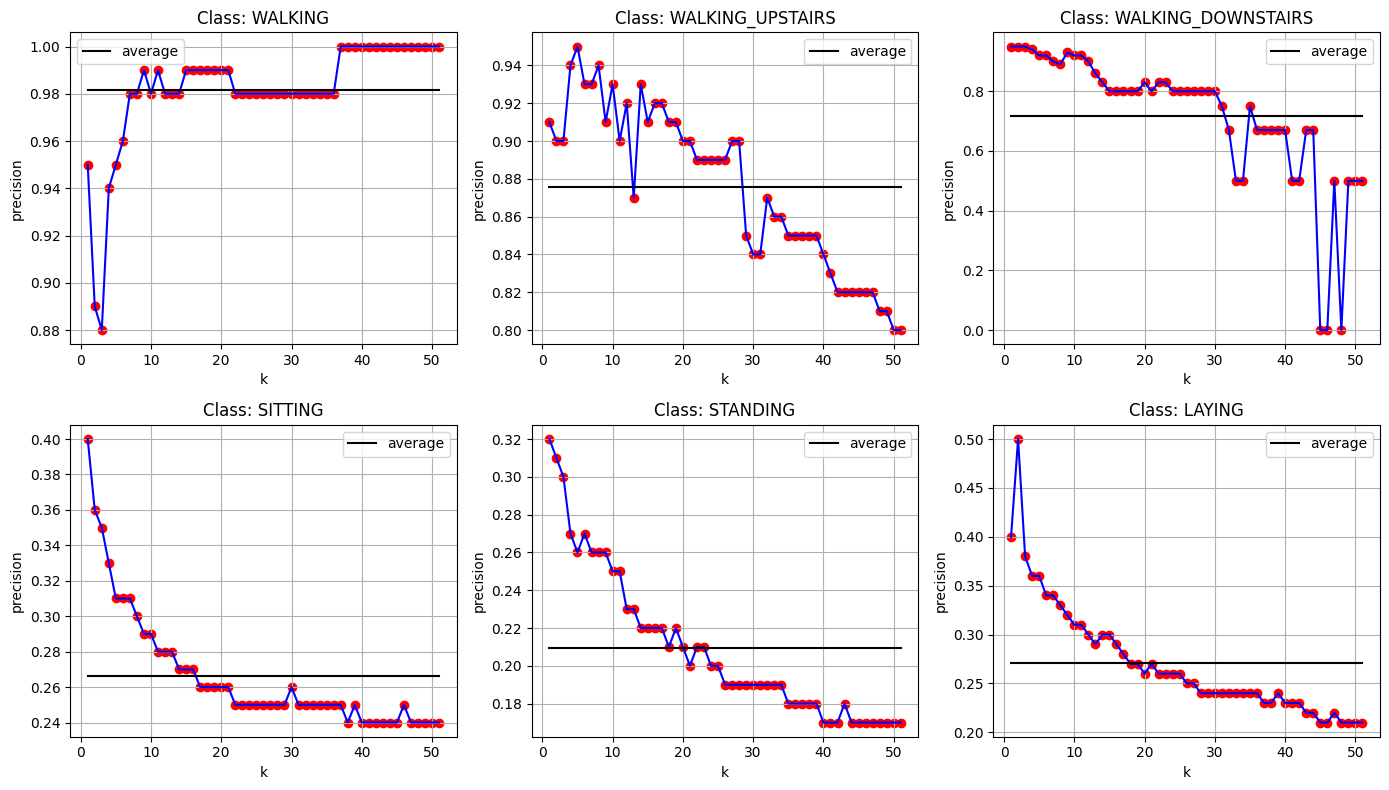

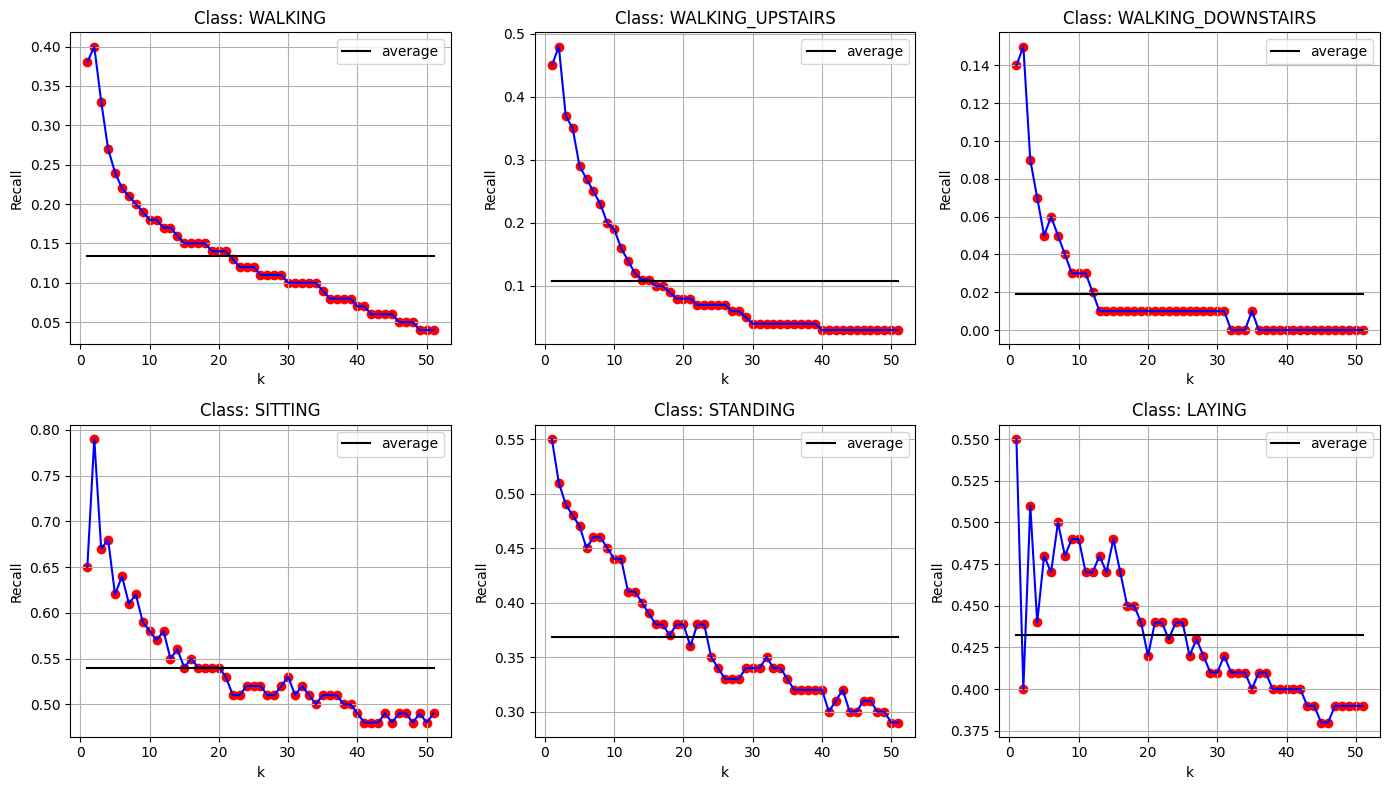

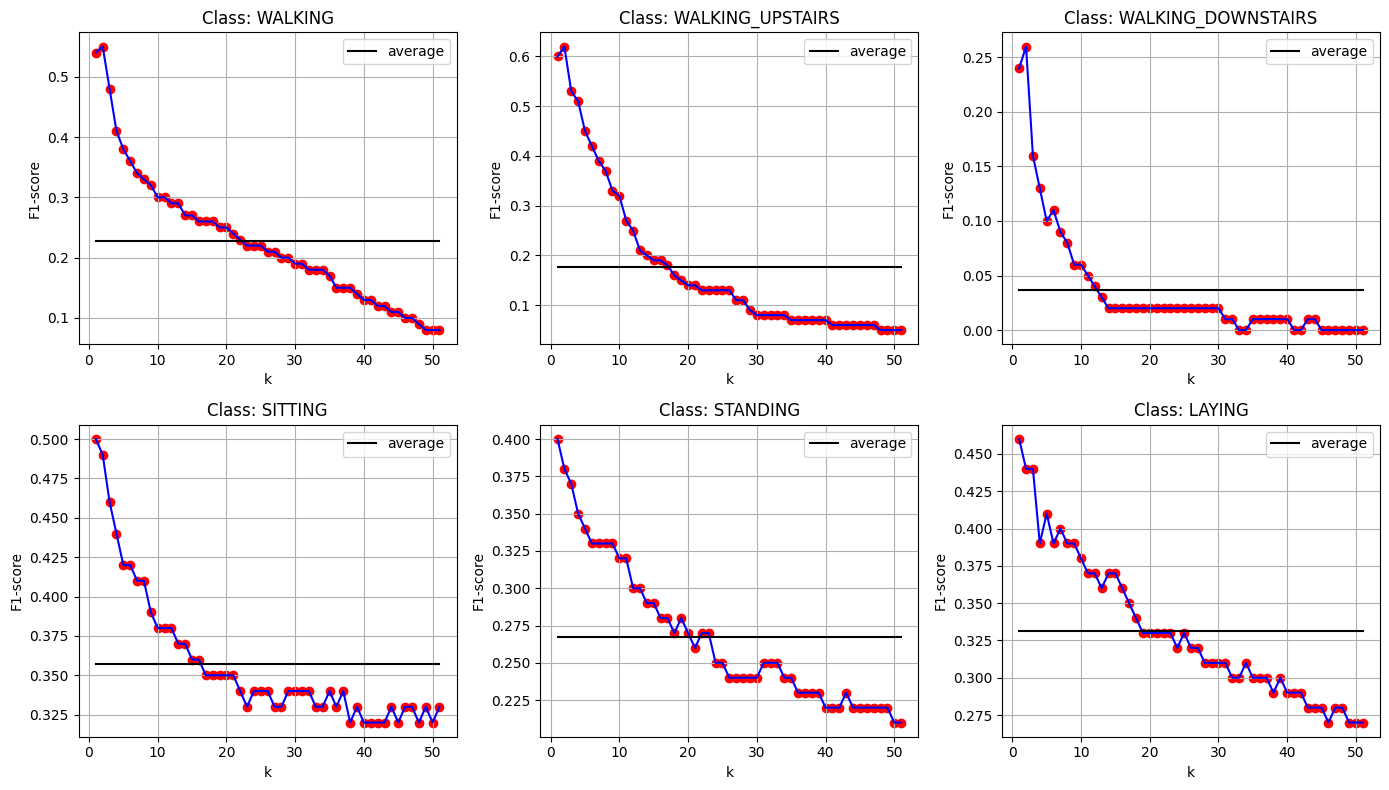

In [49]:
def plot_curves_classes(curves=[], n=1, class_names=[], label='precision'):
    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))

    for idx, ax in enumerate(axs.flat):
        curves_ = [float(valor) for valor in curves[idx]]
        ax.scatter(range(1,n+1), curves_ , color='red')
        ax.plot(range(1,n+1), curves_ , color='blue')
        ax.plot(range(1,n+1), np.full( n, statistics.mean(curves_)), color='black', label='average' )
        ax.legend(loc='best')
        ax.set_title('Class: ' + class_names[idx])
        ax.set_xlabel('k')
        ax.set_ylabel(label)
        ax.grid()

    plt.tight_layout()
    plt.savefig(f'{path_drive}/fig05_{label}.eps', format='eps')
    plt.show()


# Suponha que 'precision' seja uma lista de listas contendo as precisões para cada classe
# e 'n_range' seja a lista de valores de k
# dict_classes= { 1:'WALKING', 2:'WALKING_UPSTAIRS', 3:'WALKING_DOWNSTAIRS', 4:'SITTING', 5:'STANDING', 6:'LAYING',
class_names = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']
plot_curves_classes(precision, n_range, class_names)
plot_curves_classes(recall, n_range, class_names, 'Recall')
plot_curves_classes(f1_score, n_range, class_names, 'F1-score')
# plot_curves_classes(support, n_range, class_names, 'Support')


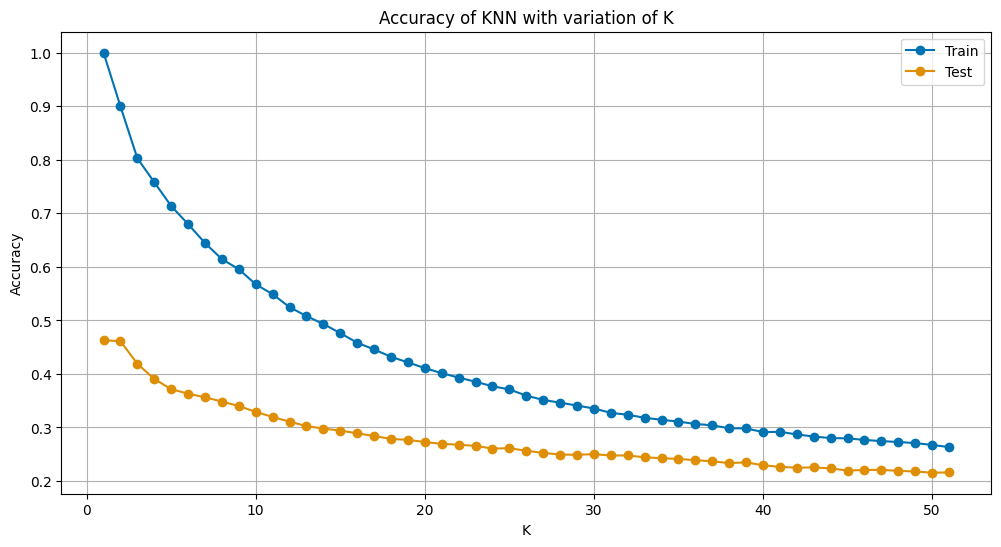

In [50]:
plt.figure(figsize=(12,6))
plt.plot(range(1, n_range+1), acc_list_train, '-o', label='Train')
plt.plot(range(1, n_range+1), acc_list_test, '-o', label='Test')
plt.legend(loc='best')
plt.title('Accuracy of KNN with variation of K')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid()
plt.savefig(f'{path_drive}/fig04_Accuracy_diferentes_k.eps', format='eps')
plt.show()

# falta adicionar o codigo para salvar automaticamente

In [53]:
# prompt: plotar confusion_matrix(y_test, pred_lr3)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_conf_matrix( y_test=[], pred_lr=[], title="Logistic Regression (newton-cg)", cm=[]):
  # Get the confusion matrix
  if len(cm) == 0:
    cm = confusion_matrix(y_test, pred_lr4)

  class_names = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']
  # Create a heatmap of the confusion matrix
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names)

  # Add labels and title
  plt.xlabel("Predicted", fontsize=14)
  plt.ylabel("Actual", fontsize=14)
  plt.title(f'Confusion Matrix for {title}', fontsize=16)

  # Save the plot
  plt.savefig(f'{path_drive}/fig04_ConfusionMatrix_{title}.eps', format='eps')

  # Show the plot
  plt.show()


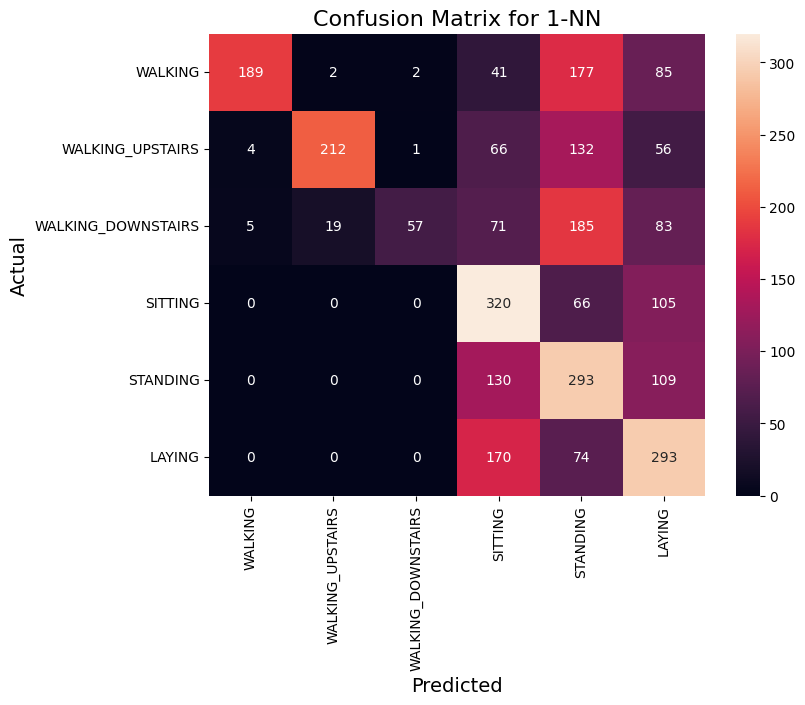

In [55]:
plot_conf_matrix( cm=conf_matrix_k[0], title="1-NN")

In [56]:
def variation_parameters_knn(alg="", w="", n_exe="", k=1):
  a=1
  knn_k1= KNeighborsClassifier( n_neighbors= k )
  result_k1= knn_k1.fit(X_train, y_train.values.ravel())

  pred_k1= knn_k1.predict(X_test)

  train_acc1= knn_k1.score(X_train, y_train)
  test_acc1= knn_k1.score(X_test, y_test)

  print('>%d, train: %.3f, test: %.3f' %(a, train_acc1, test_acc1))
  print(classification_report(y_test, pred_k1))

  # res_df = get_df_scores_to_each_class( classification_report(y_test, pred_k1), n_classes, dict_classes )

In [58]:
n_exe=1
for alg in ['ball_tree', 'kd_tree', 'brute']:
  for w in ['uniform', 'distance']:
    print(alg, w)
    variation_parameters_knn(alg, w, n_exe, 2)
    n_exe+=1

ball_tree uniform
>1, train: 0.900, test: 0.461
              precision    recall  f1-score   support

           1       0.89      0.40      0.55       496
           2       0.90      0.48      0.62       471
           3       0.95      0.15      0.26       420
           4       0.36      0.79      0.49       491
           5       0.31      0.51      0.38       532
           6       0.50      0.40      0.44       537

    accuracy                           0.46      2947
   macro avg       0.65      0.45      0.46      2947
weighted avg       0.63      0.46      0.46      2947

ball_tree distance
>1, train: 0.900, test: 0.461
              precision    recall  f1-score   support

           1       0.89      0.40      0.55       496
           2       0.90      0.48      0.62       471
           3       0.95      0.15      0.26       420
           4       0.36      0.79      0.49       491
           5       0.31      0.51      0.38       532
           6       0.50      0.40  

In [57]:
n_exe=1
for alg in ['ball_tree', 'kd_tree', 'brute']:
  for w in ['uniform', 'distance']:
    print(alg, w)
    variation_parameters_knn(alg, w, n_exe)
    n_exe+=1

ball_tree uniform
>1, train: 1.000, test: 0.463
              precision    recall  f1-score   support

           1       0.95      0.38      0.54       496
           2       0.91      0.45      0.60       471
           3       0.95      0.14      0.24       420
           4       0.40      0.65      0.50       491
           5       0.32      0.55      0.40       532
           6       0.40      0.55      0.46       537

    accuracy                           0.46      2947
   macro avg       0.66      0.45      0.46      2947
weighted avg       0.64      0.46      0.46      2947

ball_tree distance
>1, train: 1.000, test: 0.463
              precision    recall  f1-score   support

           1       0.95      0.38      0.54       496
           2       0.91      0.45      0.60       471
           3       0.95      0.14      0.24       420
           4       0.40      0.65      0.50       491
           5       0.32      0.55      0.40       532
           6       0.40      0.55  

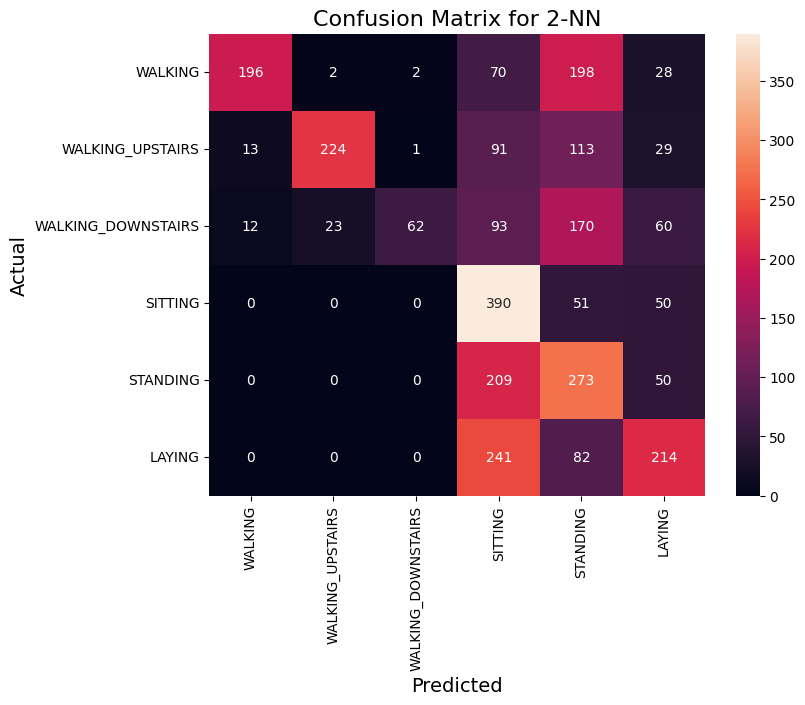

In [54]:
plot_conf_matrix( cm=conf_matrix_k[1], title="2-NN")